## TwoLayerNet in Keras

In [3]:
from tensorflow import keras

In [4]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [5]:
from tensorflow.keras import layers, models

# Define a simple model using Keras' Sequential API
model = models.Sequential([
    layers.Dense(100, activation="sigmoid", input_shape=(784, )),
    layers.Dense(10, activation="softmax")
])

c:\Users\rusta\anaconda3\envs\ece5831-2023\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
# We need training data!!

from tensorflow.keras.datasets import mnist

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train[0].shape

(28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
from tensorflow.keras.utils import to_categorical
to_categorical(y_train, num_classes=10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Preprocess datasets

In [12]:
# Reshape 28x28 to 784
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [13]:
x_train.shape

(60000, 784)

In [14]:
# Normalize values to 0 .. 1
x_train = x_train/255.0
x_test = x_test/255.0

In [15]:
y_train = to_categorical(y_train, num_classes=10)
y_test =  to_categorical(y_test, num_classes=10)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [17]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5263 - loss: 1.8555
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8356 - loss: 0.8012
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8646 - loss: 0.5672
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8814 - loss: 0.4722
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8907 - loss: 0.4186
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8963 - loss: 0.3889
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8972 - loss: 0.3727
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9008 - loss: 0.3546
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9048 - loss: 0.3411
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9062 - loss: 0.3284
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9090 - loss: 0.3196
Epoch 12/20
1875/1875 ━━━━━━━━

In [18]:
predictions = model.predict(x_test[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [19]:
import numpy as np

In [20]:
predictions = np.argmax(predictions, axis=1)

In [21]:
predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [22]:
labels = np.argmax(y_test[0:10], axis=1)

In [23]:
labels

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [24]:
predictions == labels

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

## LeNet in Keras

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [26]:
class LeNet:
    def __init__(self, batch_size=32, epochs=20):
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self._create_lenet()
        self._compile()
    

    def _create_lenet(self):
        self.model = Sequential([
            Conv2D(filters=6, kernel_size=(5,5), 
                   activation='sigmoid', input_shape=(28, 28, 1), 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),
            
            Conv2D(filters=16, kernel_size=(5,5), 
                   activation='sigmoid', 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Flatten(),

            Dense(120, activation='sigmoid'),
            Dense(84, activation='sigmoid'),
            Dense(10, activation='softmax')
        ])

    def _compile(self):
        if self.model is None:
            print('Error: Create a model first..')
        
        self.model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
        

    def _preprocess(self):
        # load mnist data
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # normalize
        x_train = x_train/255.0
        x_test = x_test/255.0

        # add channel dim
        self.x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
        self.x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  

        # one-hot encoding
        self.y_train = to_categorical(y_train, 10)
        self.y_test = to_categorical(y_test, 10)

    def train(self):
        self._preprocess()
        self.model.fit(self.x_train, self.y_train, 
                  batch_size=self.batch_size, 
                  epochs=self.epochs)
    
    def save(self, model_path_name):
        self.model.save(f"{model_path_name}.keras")
        print("Successfully saved model")

    def load(self, model_path_name):
        self.model = load_model(f"{model_path_name}.keras")
        print("Successfully loaded model")
    
    def predict(self, images):
        x_test_subset = images.reshape(-1, 28, 28, 1)
        predictions = np.argmax(self.model.predict(x_test_subset), axis=1)
        return predictions

In [27]:
lenet = LeNet(batch_size=64, epochs=10)

c:\Users\rusta\anaconda3\envs\ece5831-2023\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
lenet.train()

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3879 - loss: 1.7174
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9188 - loss: 0.2749
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9493 - loss: 0.1673
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9625 - loss: 0.1243
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9656 - loss: 0.1077
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9732 - loss: 0.0878
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9768 - loss: 0.0758
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9788 - loss: 0.0688
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9813 - loss: 0.0607
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9824 - loss: 0.0539


In [29]:
#predictions = np.argmax(lenet.model.predict(x_test[0:10]), axis=1)

# Ensure the input is reshaped to the correct shape: (10, 28, 28, 1)
x_test_subset = lenet.x_test[0:10].reshape(-1, 28, 28, 1)

# Get predictions for the first 10 test samples
predictions = np.argmax(lenet.model.predict(x_test_subset), axis=1)

print("Predictions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9]


In [30]:
labels = np.argmax(lenet.y_test[0:10], axis=1)

In [31]:
print(labels)

[7 2 1 0 4 1 4 9 5 9]


In [32]:
print(predictions == labels)

[ True  True  True  True  True  True  True  True  True  True]


Saving the model

In [33]:
lenet.save("Aslam_cnn_model")

Successfully saved model


Creating a new instance, and loading the previously saved model into the new instance

In [34]:
new_lenet = LeNet()

new_lenet.load("Aslam_cnn_model")

x_test_subset = lenet.x_test[0:10].reshape(-1, 28, 28, 1)
predictions = np.argmax(new_lenet.model.predict(x_test_subset), axis=1)
predictions

Successfully loaded model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

Making sure predict function works correctly

In [35]:
res = new_lenet.predict(lenet.x_test[0:10])
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

Test Handwriting Images

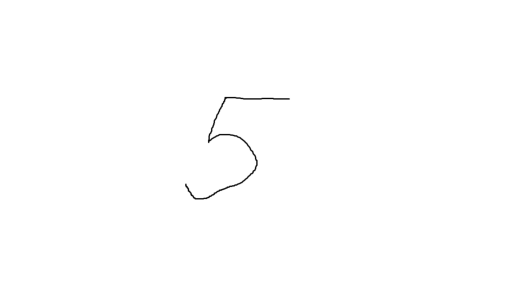

In [36]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("5_2.png")

plt.imshow(image)
plt.axis('off')
plt.show()

Prediction on a single image

In [45]:
image_filename = "5_4.png"
new_image = Image.open(image_filename).convert('L') 
new_image = new_image.resize((28,28)) 
new_image = np.array(new_image)
new_image = 255 - new_image
new_image = (new_image - np.min(new_image)) * (255 / (np.max(new_image) - np.min(new_image)))
new_image = new_image.astype(np.float32) / 255.0  
new_image = new_image.flatten()
new_image = new_image.reshape((1, 784))

res = new_lenet.predict(new_image)
res 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([5], dtype=int64)